## 500city_explore - Exploring the data from 500 cities data set and checking for data cleanliness. We will fill missing data and check for outliers.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import cleansed data sets

In [90]:
data = pd.read_csv('../data/cleansed/data.csv',index_col=0)
locations = pd.read_csv('../data/cleansed/locations.csv',index_col=0)
dataDef = pd.read_csv('../data/cleansed/data_def.csv',index_col=0)

In [114]:
data.head()

,uniqueid,datavaluetypeid,populationcount,ACCESS2,ARTHRITIS,BINGE,BPHIGH,BPMED,CANCER,CASTHMA,...,KIDNEY,LPA,MAMMOUSE,MHLTH,OBESITY,PAPTEST,PHLTH,SLEEP,STROKE,TEETHLOST
0,0107000,AgeAdjPrv,212237.0,0.198,0.310,0.112,0.441,0.701,0.057,0.115,...,0.035,0.373,0.797,0.156,0.427,0.801,0.164,0.469,0.052,0.259
1,0107000,CrdPrv,212237.0,0.196,0.309,0.113,0.438,0.813,0.057,0.115,...,0.036,0.370,0.768,0.156,0.419,0.786,0.164,0.465,0.052,0.261
2,0107000-01073000100,CrdPrv,3042.0,0.239,0.325,0.101,0.462,0.800,0.052,0.127,...,0.036,0.423,0.742,0.188,0.467,0.760,0.196,0.504,0.055,0.302
3,0107000-01073000300,CrdPrv,2735.0,0.288,0.313,0.108,0.456,0.803,0.046,0.118,...,0.038,0.437,0.740,0.185,0.470,0.732,0.202,0.494,0.057,0.333
4,0107000-01073000400,CrdPrv,3338.0,0.261,0.346,0.095,0.501,0.820,0.052,0.130,...,0.040,0.449,0.736,0.191,0.488,0.728,0.211,0.525,0.065,0.360


# Create Dataframe of census tracts, create heatmap of column correlations

In [91]:
# Create Dataframe
dataLoc = data.set_index('uniqueid').join(locations.set_index('uniqueid')[['cityname','stateabbr','geographiclevel']])
censusDF = dataLoc[dataLoc['geographiclevel']=='Census Tract'].reset_index().set_index(['uniqueid','cityname','stateabbr']).drop(['datavaluetypeid','geographiclevel'],axis=1)

In [127]:
dataDefCrude = dataDef[dataDef['data_value_type']=='Crude prevalence'].set_index('measureid')


tst = censusDF.reset_index().melt(id_vars=['uniqueid','cityname','stateabbr','populationcount'],var_name='measureid',value_name='value')

tst1 = tst.join(dataDef['categoryid'].values,rsuffix='_r',on='measureid',)
tst1

ValueError: Joining multiple DataFrames only supported for joining on index

C:\Users\rich.wolff\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


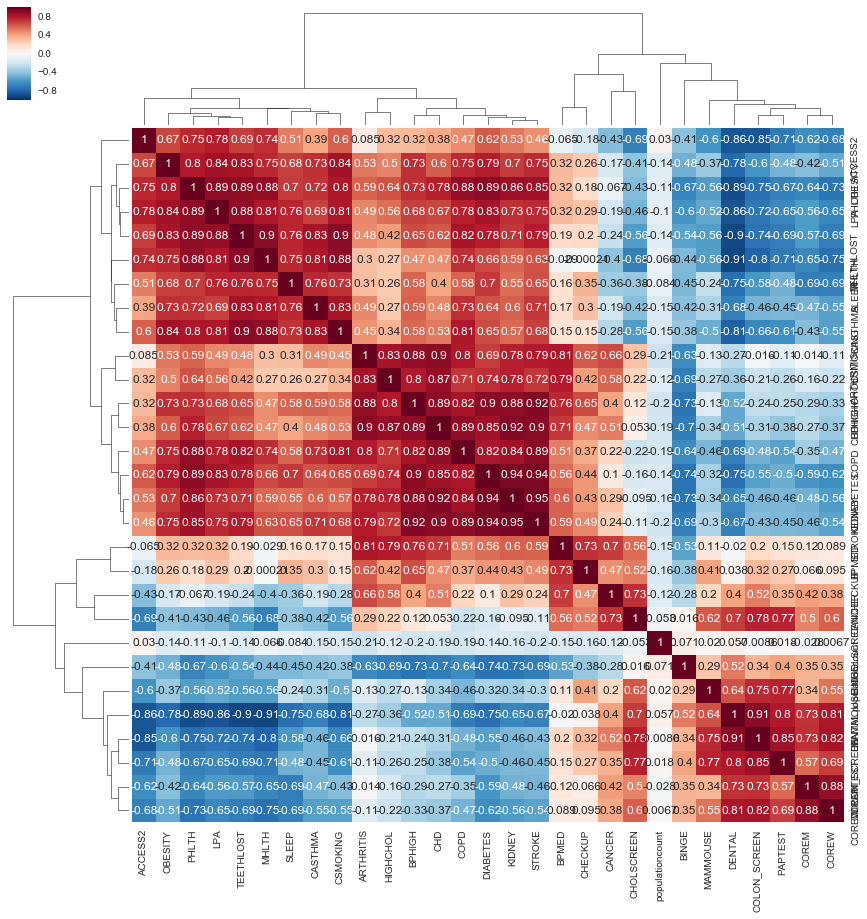

In [81]:
#Create heatmap
sns.clustermap(censusDF.corr(),annot=True,figsize=(15,15))
plt.show()

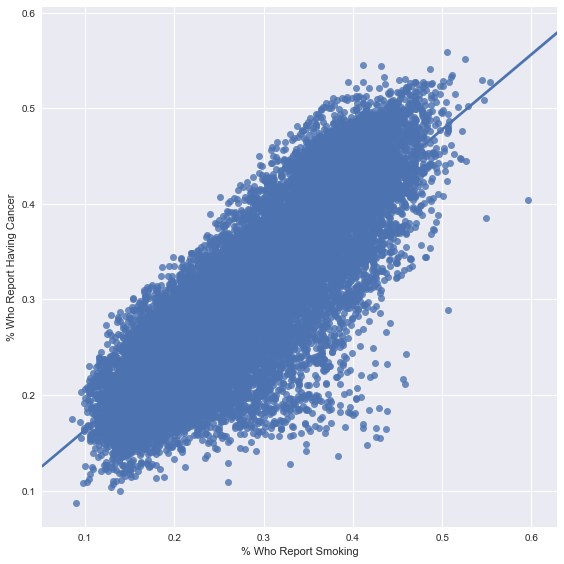

In [77]:
smoking = dataLoc.reset_index().copy()
plt.figure(figsize=(15,10))
_ = sns.lmplot(x='LPA',y='OBESITY',data=dataLoc,size=,8)
_ = plt.xlabel('% Who Report Smoking')
_ = plt.ylabel('% Obese')
plt.show()
